In [11]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df = pd.read_csv(url)
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
X = df[['Latitude', 'Longitude', 'MedInc']]

In [4]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [5]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [6]:
train_clust = kmeans.labels_
X_train_clust = X_train.copy()
X_train_clust['cluster'] = train_clust

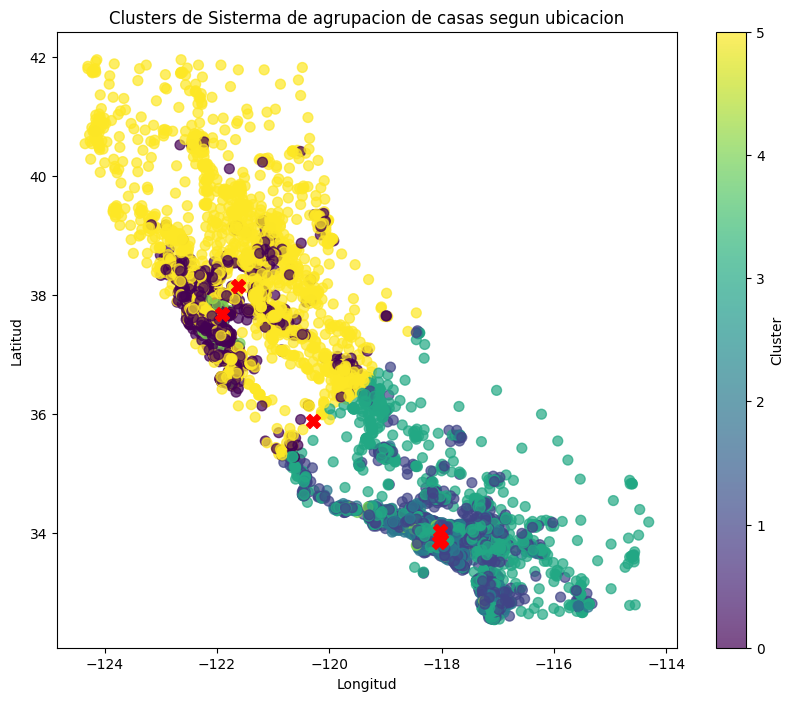

In [7]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_train['Longitude'], X_train['Latitude'], 
    c = train_clust,
    cmap = 'viridis', 
    s= 50, 
    alpha = 0.7)

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
    c = 'red',
    marker = 'X',
    s = 100)

plt.colorbar(scatter, label = 'Cluster')
plt.title('Clusters de Sisterma de agrupacion de casas segun ubicacion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [8]:
test_clust = kmeans.predict(X_test)

X_test_clust = X_test.copy()
X_test_clust['cluster'] = test_clust

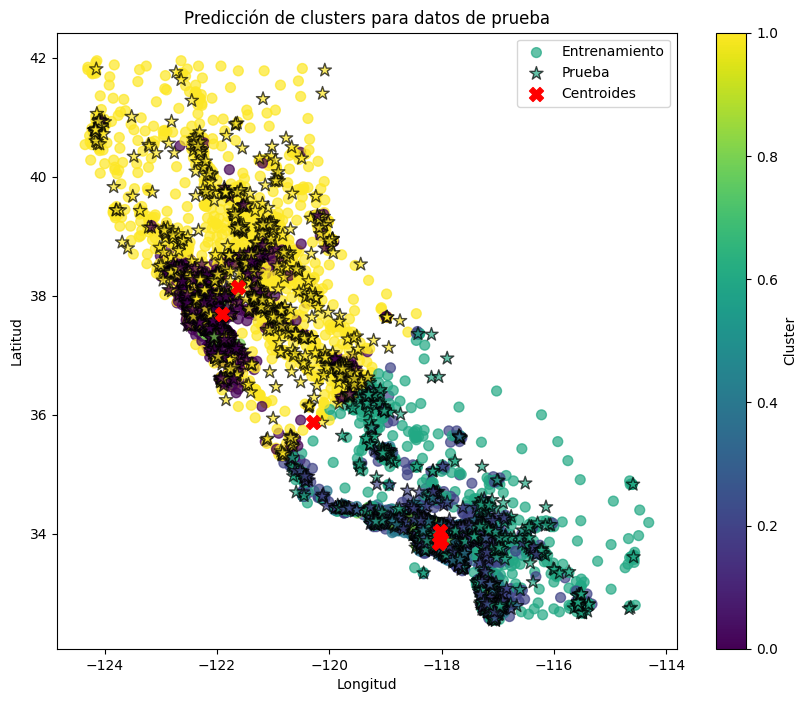

In [9]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train['Longitude'], X_train['Latitude'], 
           c=train_clust, 
           cmap='viridis', 
           s=50, 
           alpha=0.7, 
           label='Entrenamiento')

plt.scatter(X_test['Longitude'], X_test['Latitude'], 
           c=test_clust, 
           cmap='viridis', 
           s=100, 
           marker='*', 
           edgecolors='black', 
           alpha=0.7, 
           label='Prueba')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
           c='red', 
           marker='X', 
           s=100, 
           label='Centroides')

plt.colorbar(label='Cluster')
plt.title('Predicción de clusters para datos de prueba')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [18]:
X_train_feat = X_train.copy()
y_train_labels = train_clust

X_test_feat = X_test.copy()
y_test_labels = test_clust

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_feat, y_train_labels)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf.predict(X_test_feat)
accuracy = accuracy_score(y_test_labels, y_pred)
conf_matrix = confusion_matrix(y_test_labels, y_pred)
class_report = classification_report(y_test_labels, y_pred)

In [20]:
print(f"Precisión del modelo: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(class_report)

Precisión del modelo: 0.9956

Matriz de confusión:
[[ 558    1    0    0    0    2]
 [   0  982    0    1    0    0]
 [   0    0  298    0    1    0]
 [   0    2    0 1107    0    2]
 [   0    0    2    0   60    0]
 [   3    2    0    2    0 1105]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



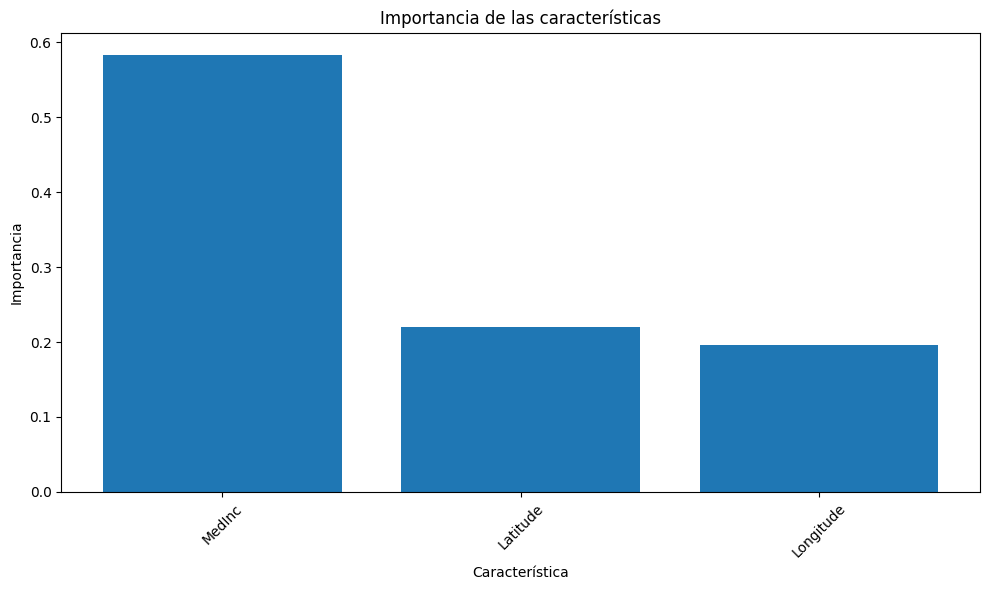

In [22]:
feature_importance = pd.DataFrame({
    'Feature': X_train_feat.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importancia de las características')
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()